>**Alumnos**: *Arturo Barbero Pérez y Adrián Ogáyar Sanchez*

>**Grupo**: *11*

***

## REGRESIÓN LOGÍSTICA

Importamos las librerías que van a ser necesarias durante el desarrollo de la práctica:
La librería ***Pyplot*** es necesaría para poder hacer el graficado tanto de los datos, como de la frontera de decisión.
***NumPy*** es la librería que nos permite realizar calculos entre matrices y vectores de manera de más eficiente gracias a la vectorización.
Importamos además ***Read_csv*** que se va a encargar de obtener los datos del fichero csv. 
Por último, utilizamos ***Optimize*** de SciPy, que nos permite obtener el vector $\theta$ necesario para poder calcular nuestra hipótesis.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
import scipy.optimize as opt

### Visualización de los datos

Vamos a comenzar visualizando los datos del fichero 'ex2data1.csv' en una gráfica. 
Para ello definimos una función que se encargue de leer el fichero:

In [2]:
def lee_csv(file_name):
    valores = read_csv(file_name, header=None).values

    return valores.astype(float)

In [3]:
X = lee_csv("ex2data1.csv")

Una vez tenemos los datos en una variable, en este caso X, pasamos a graficar estos:

In [4]:
def graficaDatos(x):
    plt.figure()
    # Obtiene un vector con los indices de los ejemplos positivos
    pos = np.where(x[:,2] == 1)
    
    # Dibuja los ejemplos positivos
    plt.scatter(x[pos, 0], x[pos, 1], marker='+', c='k', label='Admitted')
    
    # Obtiene un vector con los indices de los ejemplos negativos
    pos = np.where(x[:,2] == 0)
    
    # Dibuja los ejemplos positivos
    plt.scatter(x[pos,0], x[pos,1], marker='o', c='y', label='Not admitted')
    
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(loc=0)
    
    return

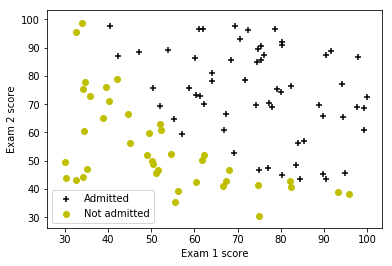

In [5]:
graficaDatos(X)

### Función sigmoide

Implementamos una función que calcule el valor de la función sigmoide. Esta función viene dada por la siguiente representación matemática:

$$g(z) = \frac{1}{1 + e^{-z}}$$

Se puede aplicar tanto para un número, como para un vector o una matriz. En caso de aplicarse a una de estas dos últimas opciones devuelve el resultado de aplicar el calculo a cada uno de sus elementos.

In [6]:
g = lambda z: 1 / (1 + np.exp(-z))

### Cálculo de la función de coste y su gradiente

Para realizar este apartado, debemos primero tener separada la información de los datos del fichero '.csv'

In [7]:
# Matriz con los datos Xi
x = X[:, 0:2]

# Vector con las correspondientes clasificaciones de los datos Xi
y = X[:, 2]

# Vector de thetas inicializados a 0 con la forma (3,)
theta = np.zeros((x[0].size + 1))

#Vector de 1's con la longitud de x
one = np.ones( [len(x) , 1], int)

#Matriz de x con el 1 añadido en el elemento x0
x = np.hstack([one, x])

La función de coste se puede calcular en forma vectorizada de la siguiente manera:

$$J(\theta) = - \frac{1}{m}·{( (log(g(X\theta) ))^{T}y) + (log(1 - g(X\theta)))^{T}(1-y)}$$

In [8]:
def funCoste(theta, x, y):
    return -1/len(x) * (((np.log( g(x.dot(theta)) )).T).dot(y) + 
                        ((np.log( 1 - g(x.dot(theta)) )).T).dot(1-y))

EL gradiente de la función de coste se calcula a partir de la derivada de este y es un vector de la misma longitud que $\theta$. Se puede calcular de forma vectorizada de la siguiente manera: 

$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}·{ X^{T} (g(X\theta) - y)}$$

In [9]:
def gradient(theta, x, y):
    return 1/len(x) * (x.T).dot(g(x.dot(theta)) - y)

Para comprobar que las funciones son correctas las ejecutaremos con un valor de $\theta = 0$. Deberíamos obtener un valor para la función de coste de 0,693, aproximadamente y un gradiente de [-0.1 -12.0092 -11.2628]

In [10]:
print('J(theta): ' +str(funCoste(theta, x, y)) + '\n')
print('Theta: '+str(gradient(theta, x, y)) + '\n')

J(theta): 0.6931471805599453

Theta: [ -0.1        -12.00921659 -11.26284221]



### Cálculo del valor óptimo de los parámetros

Para obtener el valor óptimo de los parámetros $\theta$ podemos utilizar también la función ***fmin_tnc*** de ***Optimize***. Esta nos asegura este resultado, pasándole como parámetro el nombre de la función a optimizar (funCoste), un vector con los valores iniciales a optimizar (theta), el nombre de la función que calcula el gradiente (gradient) y, por último, una tupla con argumentos extra, que se deben pasar tanto a la función de coste como a la del gradiente. En este caso son las matrices 'x' e 'y'. Una vez obtenido el vector $\theta$ optimizado, la función de coste debe dar un resultado de 0.203 aproximadamente.

In [11]:
result = opt.fmin_tnc(func=funCoste, x0=theta, fprime=gradient, args=(x, y))
theta_opt = result[0]
print('Theta optimizada: '+str(theta_opt) + '\n')
print('J(theta): ' +str(funCoste(theta_opt, x, y)))

Theta optimizada: [-25.16131866   0.20623159   0.20147149]

J(theta): 0.20349770158947447


Una vez tenemos las $\theta$ optimizadas y hemos calculado el coste de la función, podemos pasar a dibujar la frontera que divide los alumnos que están admitidos de los que no. Esta debe graficarse con el vector $\theta$ optimizado.

In [12]:
def pinta_frontera_recta(theta, x):
    graficaDatos(x)
    
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                           np.linspace(x2_min, x2_max))

    h = g(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(),
                xx2.ravel()].dot(theta))
    
    h = h.reshape(xx1.shape)

    # El cuarto parámetro es el valor de z cuya frontera se quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

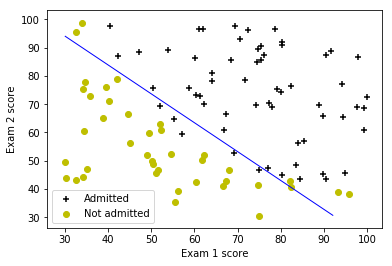

In [13]:
pinta_frontera_recta(theta_opt, X)

### Evaluación de la regresión logística

En este apartado pasamos a definir una función que se encargue de calcular el porcentaje de admitidos entre todos los datos.

In [14]:
def calculaPorcentajes(theta, x):
    #Calculamos un porcentaje para cada ejemplo de entrenamiento
    porcentajes = g(x.dot(theta_opt))
    
    #Escogemos aquellos cuyo porcentaje sea >= 0.5
    clasificados = porcentajes[porcentajes >= 0.5]
    
    return len(clasificados)

In [15]:
print('Porcentaje de admitidos: ' + str(calculaPorcentajes(theta_opt, x)))

Porcentaje de admitidos: 61


In [16]:
y_1 = y[y == 1]
print(len(y_1))

60


Si calculamos el número de ejemplos de entrenamiento cuya y = 1, veremos que da 60, en lugar de 61. Esto se debe, como podemos ver en la gráfica de arriba, a que hay ejemplos de entrenamiento cuya y = 1, que se consideran no admitidos y viceversa, ejemplos cuya y = 0 y se consideran admitidos. Estos ultimos son mayores dando de esta manera un porcentaje de admitidos mayor.

***

## Regresión logística regularizada

El objetivo de este programa es obtener la función de regresión logística con unos datos que no se encuentran separados en base a una recta.

Disponemos de un fichero de datos (*ex2data2.csv*) que contiene los datos de los test de prueba de una serie de microchips, junto con un valor binario (0,1) sobre si pasó (1) o no pasó (0) el control de calidad.

Empezamos por importar las librerias necesarias, ***sklearn.preprocessing*** es necesario para obtener los polinomios de una matriz de valores $x_i$: 

In [17]:
import sklearn.preprocessing as skp

Usando las funciones ***lee_csv*** y ***graficaDatos*** de la parte anterior leemos y mostramos los datos en una gráfica.

In [18]:
def graficaDatos(x):
    # Obtiene un vector con los indices de los ejemplos positivos
    pos = np.where(x[:,2] == 1)
    
    # Dibuja los ejemplos positivos
    plt.scatter(x[pos, 0], x[pos, 1], marker='+', c='k', label='Accepted')
    
    # Obtiene un vector con los indices de los ejemplos negativos
    pos = np.where(x[:,2] == 0)
    
    # Dibuja los ejemplos positivos
    plt.scatter(x[pos,0], x[pos,1], marker='o', c='y', label='Not accepted')
    
    plt.xlabel("Microchip test 1")
    plt.ylabel("Michochip test 2")
    plt.legend(loc=0)
    
    return

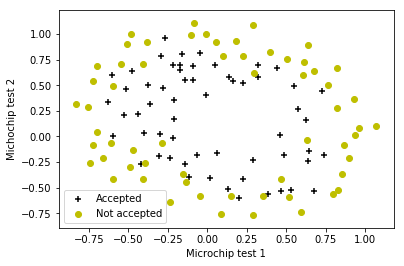

In [19]:
X = lee_csv("ex2data2.csv")
graficaDatos(X)

Como se puede comprobar en la gráfica, los datos se encuentran mucho más dispersos que en el caso anterior, haciendo imposible el encontrar una función lineal que los separe en 2 grupos.

### Mapeo de los atributos

Para obtener un mejor ajuste en la función respecto a los ejemplos de entrenamiento añadimos más variables $\theta$. Para esto usamos la función ***PolynomialFeatures***, obteniendo así los términos polinomicos de los datos de $x$ hasta la sexta potencia.

In [20]:
x = X[:,0:2]

poly = skp.PolynomialFeatures(6)
x = poly.fit_transform(x)

x.shape

(118, 28)

### Cálculo de la función de coste y su gradiente

Definimos las funciones de coste y de gradiente, que en forma vectorizada se caculan de la siguiente forma:

$$J(\theta)= \frac{-1}{m} ((log(g(X\theta)))^Ty+log(1-g(X\theta)))^T(1-y)+\frac{\lambda}{2m}\Sigma\theta^2$$

$$\frac{\delta J(\theta)}{\delta\theta_j}=\frac{1}{m}X^T(g(X\theta)-y)+\frac{\lambda}{m}\theta$$

In [21]:
g = lambda z: 1 / (1 + np.e**-z)

def gradient(theta, x, y, lamb):
    return 1/len(x) * (x.T).dot(g(x.dot(theta)) - y) + (lamb/len(x))*theta

def funCoste(theta, x, y, lamb):
    return -1/len(x) * (((np.log( g(x.dot(theta)) )).T).dot(y) +
                        ((np.log( 1 - g(x.dot(theta)) )).T).dot(1-y) +
                        (lamb/(2*len(x))*(np.sum(theta))**2))

Ejecutamos ambas funciones con unas $\theta s$ iniciales iguales a 0, obteniendo los siguientes valores:

In [22]:
# Vector con las correspondientes clasificaciones de los datos Xi
y = X[:, 2]

# Vector de thetas inicializados a 0 con la forma (28, )
theta = np.zeros((x[0].size))

print('J(theta): ' +str(funCoste(theta, x, y, 1)) + '\n')
print('Theta: '+str(gradient(theta, x, y, 1)) + '\n')

J(theta): 0.6931471805599453

Theta: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]



### Cálculo del valor óptimo de los parámetros

Usamos la función ***fmin_tnc*** de la libreria ***optimize*** para obtener los valores de theta optimos con $\lambda=1$, que darán lugar a la linea de frontera entre las variables.

In [23]:
result = opt.fmin_tnc(func=funCoste, x0=theta, fprime=gradient, args=(x,y,1))
theta_opt = result[0]

Definimos una función *graficarFronteraDecision* que generá una gráfica igual a la primera pero esta vez con la gráfica resultante de la función *opt.fmin_tnc*, la cual muestra la frontera de decisión que separa los datos de prueba en 2 grupos con una $\lambda$.

In [24]:
def graficarFronteraDecision(X, theta, poly, lamb):
    graficaDatos(X)
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = g(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    plt.title('lambda = ' + str(lamb))

Para facilitar la ejecución con múltiples $\lambda s$ creamos ***funcionOptima***, que recibe un $\lambda$ y ejecuta los pasos anteriores automáticamente.

In [25]:
def funcionOptima(lamb) :
    result = opt.fmin_tnc(func=funCoste, x0=theta, fprime=gradient, args=(x,y,lamb))
    theta_opt = result[0]
    
    graficarFronteraDecision(X, theta_opt, poly, lamb)
    
    return

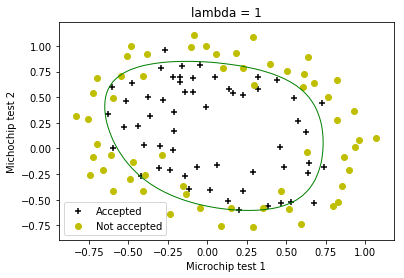

In [26]:
funcionOptima(1)

Como se puede comprobar, la linea que separa las variables de microchips aceptados y los que no se ajusta con una precisión aceptable, si bien no es perfecta y existen muchos puntos que no corresponden a su valor real. De este modo si aumentamos la $\lambda$ obtendremos los siguientes resultados.

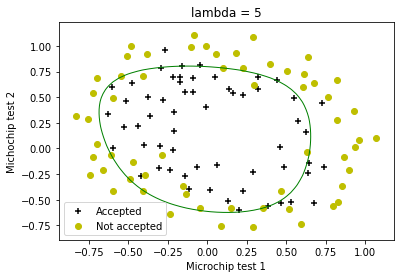

In [27]:
funcionOptima(5)

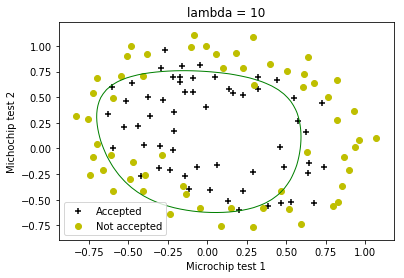

In [28]:
funcionOptima(10)

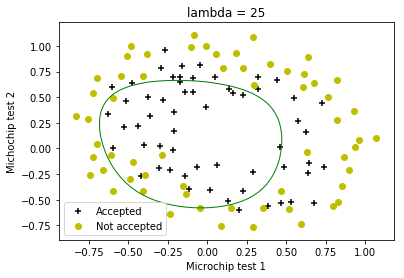

In [29]:
funcionOptima(25)

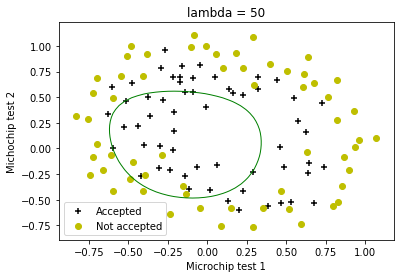

In [30]:
funcionOptima(50)

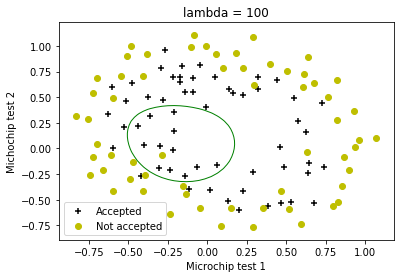

In [31]:
funcionOptima(100)

Como se puede ver esta linea de separación irá cercando cada vez más los valores positivos a la izquierda de la gráfica, ya que es donde se encuentra el mayor conjunto de chips aceptados. Esto hace que una $\lambda$ correcta dé lugar a unas predicciones más precisas, ya que cualquier chip que se encuentre fuera probablemente sea rechazado. Sin embargo una $\lambda$ excesivamente grande puede hacer que la linea de frontera sea demasiado pequeña, volviéndola imprecisa, pues no tendrá en cuenta otros valores que han sido aceptados en los datos de prueba pero que se encuentran separados del grupo principal.

Por esto lo ideal sería usar una $\lambda$ de 5-10 que se ajuste a los casos de prueba, pero sea lo bastante grande como para ofrecer cierto margen y separar los valores con la mayor precisión posible pero teniendo en cuenta las anomalías que puedan suceder.